In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, spearmanr, kruskal
import seaborn as sbs

In [34]:
dataset= pd.read_csv("AmesHousing.csv",sep='\t')
dataset.head()
dataset.shape

(2930, 82)

In [35]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [36]:
localCopy=dataset.copy(deep=True)

In [37]:

for column in localCopy:
    if localCopy[column].isna().sum()>2000:
        print(column)
        localCopy.drop(column, axis=1, inplace=True)



Alley
Pool QC
Fence
Misc Feature


In [38]:
for i in localCopy["Pool Area"]:
    if i>0: 
        print(i)

144
480
576
555
368
444
228
561
519
648
800
512
738


In [83]:
#SEPARATION OF CATEGORICAL AND NUMERICAL FEATURES

#AmesExplanations.txt indicates a separation of the data in 4 types:
# Continuous - numerical
# Nominal - categorical
# Ordinal - usually categorical, numerical if order matters
# Discrete - usually numerical, categorical if it's an ID

cat_features = ['MS SubClass','MS Zoning','Street',
                'Lot Shape','Land Contour','Utilities','Lot Config',
                'Land Slope','Neighborhood','Condition 1','Condition 2',
                'Bldg Type','House Style','Roof Style','Roof Matl',
                'Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation',
                'Heating','Central Air','Electrical','Garage Type',
                'Paved Drive','Misc Feature','Sale Condition']

num_features = ['Lot Frontage','Lot Area','Overall Qual','Overall Cond',
                'Year Built','Year Remod/Add','Mas Vnr Area','Exter Qual',
                'Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure',
                'BsmtFin Type 1', 'BsmtFin SF 1','BsmtFinType 2','BsmtFin SF 2',
                'Bsmt Unf SF','Total Bsmt SF','HeatingQC','1st Flr SF','2nd Flr SF',
                'Low Qual Fin SF','Gr Liv Area','Bsmt Full Bath','Bsmt Half Bath',
                'Full Bath','Half Bath','Bedroom','Kitchen','KitchenQual','TotRmsAbvGrd',
                'Functional','Fireplaces','FireplaceQu',
                'Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual',
                'Garage Cond','Wood Deck SF','Open Porch SF','Enclosed Porch','3-Ssn Porch',
                'Screen Porch','Pool Area','Misc Val','Mo Sold','Yr Sold',
                'Sale Type','SalePrice']


# Features that describe a grade (ex. Quality: 1-10 or Poor/Average/Excellent) will be treated as
# numeric values. There are string values as well; these will be mapped to numbers so that the model
# understands them

# to be mapped to numbers: Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, Bsmt Exposure,
# BsmtFin Type 1, BsmtFinType 2, HeatingQC, KitchenQual, Functional, FireplaceQu, 
# Garage Finish, Garage Qual, Garage Cond, Pool QC, Fence, Sale Type

ordinal_maps = {'Exter Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Exter Cond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Bsmt Qual': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Bsmt Cond': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Bsmt Exposure': {'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4},
                'BsmtFin Type 1': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
                'BsmtFin Type 2': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
                'Heating QC': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Kitchen Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Functional': {'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8},
                'Fireplace Qu': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Garage Finish': {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3},
                'Garage Qual': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Garage Cond': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Sale Type': { 'Oth': 1,'ConLw': 2,'ConLD': 3,'COD': 4,'VWD': 5,'WD': 6,'ConLI': 7,'CWD': 8,'Con': 9,'New': 10}
                }

In [40]:
#FEATURE ENGINEERING: Scaling

from sklearn.preprocessing import MinMaxScaler

#Vrem sa scalam
#Problema in datasetul nostru: avem si stringuri ex. "RL","RM" care nu se pot scala
#Solutie: aplicam numai pt coloanele cu numere

numeric_cols = localCopy.select_dtypes(include="number").columns

scaler = MinMaxScaler()
scaled_data = localCopy.copy(deep=True)
scaled_data[numeric_cols] = scaler.fit_transform(localCopy[numeric_cols])

print(scaled_data)

         Order       PID  MS SubClass MS Zoning  Lot Frontage  Lot Area  \
0     0.000000  0.000000     0.000000        RL      0.410959  0.142420   
1     0.000341  0.000102     0.000000        RH      0.202055  0.048246   
2     0.000683  0.000104     0.000000        RL      0.205479  0.060609   
3     0.001024  0.000108     0.000000        RL      0.246575  0.046087   
4     0.001366  0.001672     0.235294        RL      0.181507  0.058566   
...        ...       ...          ...       ...           ...       ...   
2925  0.998634  0.825655     0.352941        RL      0.054795  0.031022   
2926  0.998976  0.825657     0.000000        RL           NaN  0.035453   
2927  0.999317  0.825915     0.382353        RL      0.140411  0.042726   
2928  0.999659  0.827371     0.000000        RL      0.191781  0.040711   
2929  1.000000  0.827477     0.235294        RL      0.181507  0.038921   

     Street Lot Shape Land Contour Utilities  ... Enclosed Porch 3Ssn Porch  \
0      Pave       IR

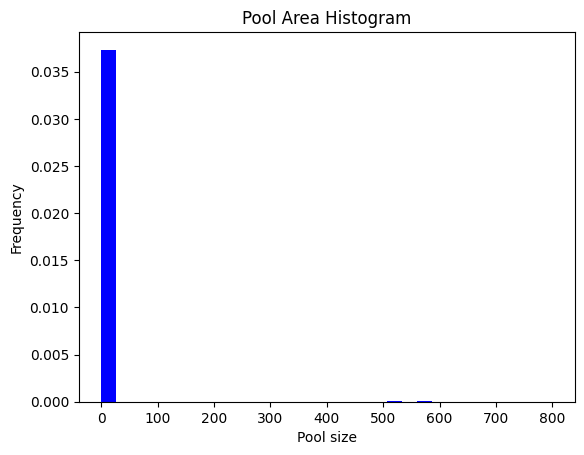

In [41]:
plt.hist(localCopy["Pool Area"],bins=30, color='blue', density=True)
plt.title('Pool Area Histogram')
plt.xlabel('Pool size')
plt.ylabel('Frequency')
plt.show()

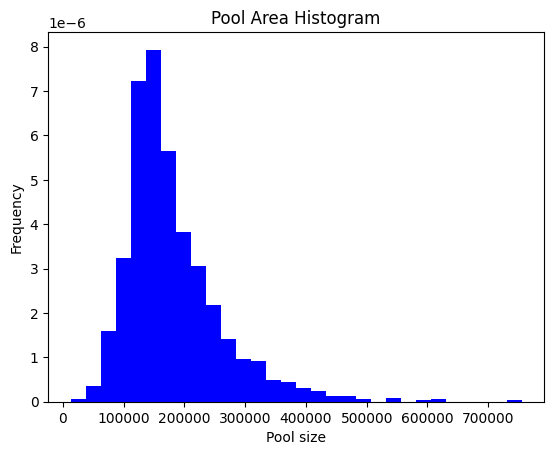

In [42]:
plt.hist(localCopy["SalePrice"],bins=30, color='blue', density=True)
plt.title('Pool Area Histogram')
plt.xlabel('Pool size')
plt.ylabel('Frequency')
plt.show()

In [43]:
localCopy.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [44]:
numerical_data=localCopy.select_dtypes(include=['int64','float64'])
corr_matrix=numerical_data.corr()

In [45]:
print(corr_matrix)

                    Order       PID  MS SubClass  Lot Frontage  Lot Area  \
Order            1.000000  0.173593     0.011797     -0.007034  0.031354   
PID              0.173593  1.000000    -0.001281     -0.096918  0.034868   
MS SubClass      0.011797 -0.001281     1.000000     -0.420135 -0.204613   
Lot Frontage    -0.007034 -0.096918    -0.420135      1.000000  0.491313   
Lot Area         0.031354  0.034868    -0.204613      0.491313  1.000000   
Overall Qual    -0.048500 -0.263147     0.039419      0.212042  0.097188   
Overall Cond    -0.011054  0.104451    -0.067349     -0.074448 -0.034759   
Year Built      -0.052319 -0.343388     0.036579      0.121562  0.023258   
Year Remod/Add  -0.075566 -0.157111     0.043397      0.091712  0.021682   
Mas Vnr Area    -0.030907 -0.229283     0.002730      0.222407  0.126830   
BsmtFin SF 1    -0.032321 -0.098375    -0.060075      0.215583  0.191555   
BsmtFin SF 2    -0.002773 -0.001145    -0.070946      0.045999  0.083150   
Bsmt Unf SF 

In [46]:
#correaltion matrix which calculates the pearson indice for numerical data


for x in corr_matrix:
    for y in corr_matrix:
        corr=corr_matrix[x][y]
        if 0.75<corr<1 or -1<corr<-0.75:
            print(f"{x} and {y}: {corr_matrix[x][y]:.2f}")

Order and Yr Sold: -0.98
Overall Qual and SalePrice: 0.80
Year Built and Garage Yr Blt: 0.83
Total Bsmt SF and 1st Flr SF: 0.80
1st Flr SF and Total Bsmt SF: 0.80
Gr Liv Area and TotRms AbvGrd: 0.81
TotRms AbvGrd and Gr Liv Area: 0.81
Garage Yr Blt and Year Built: 0.83
Garage Cars and Garage Area: 0.89
Garage Area and Garage Cars: 0.89
Yr Sold and Order: -0.98
SalePrice and Overall Qual: 0.80


In [47]:
localCopy.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [48]:
#maybe we find a row with NaN so we can delete it

for i in localCopy:
    if localCopy[i].isna().any():
        count=localCopy[i].isna().sum()
        # print(count)
        if count<=20:
            print(localCopy[localCopy[i].isna()][i])

1341   NaN
Name: BsmtFin SF 1, dtype: float64
1341   NaN
Name: BsmtFin SF 2, dtype: float64
1341   NaN
Name: Bsmt Unf SF, dtype: float64
1341   NaN
Name: Total Bsmt SF, dtype: float64
1577    NaN
Name: Electrical, dtype: object
1341   NaN
1497   NaN
Name: Bsmt Full Bath, dtype: float64
1341   NaN
1497   NaN
Name: Bsmt Half Bath, dtype: float64
2236   NaN
Name: Garage Cars, dtype: float64
2236   NaN
Name: Garage Area, dtype: float64


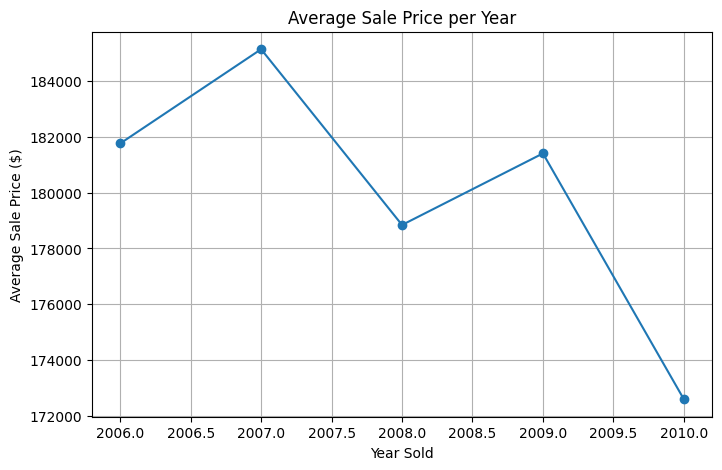

In [49]:
localCopy.groupby('Yr Sold')['SalePrice'].mean().plot( marker='o',figsize=(8,5))
plt.title('Average Sale Price per Year')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price ($)')
plt.grid(True)
plt.show()


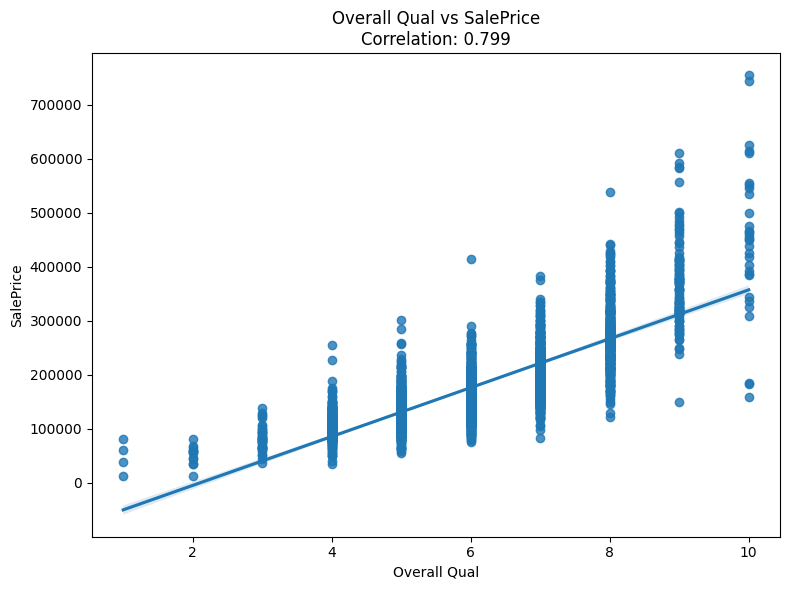

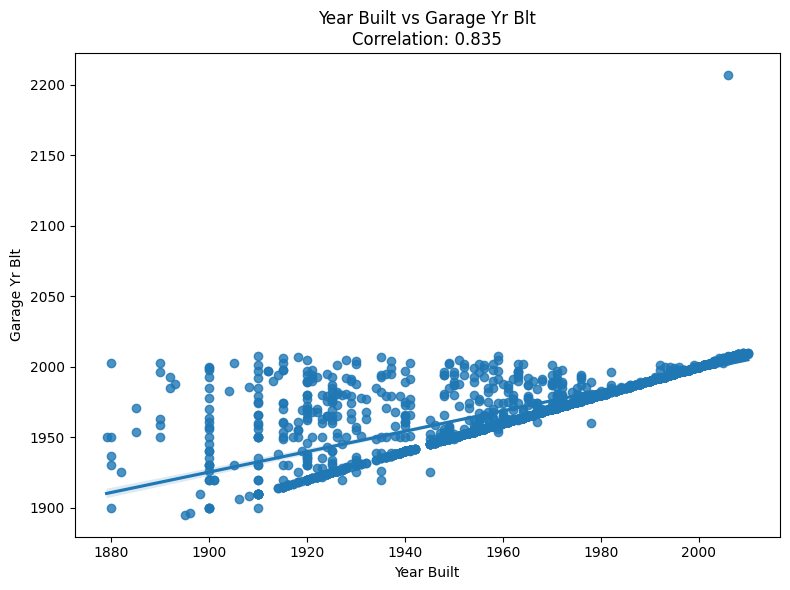

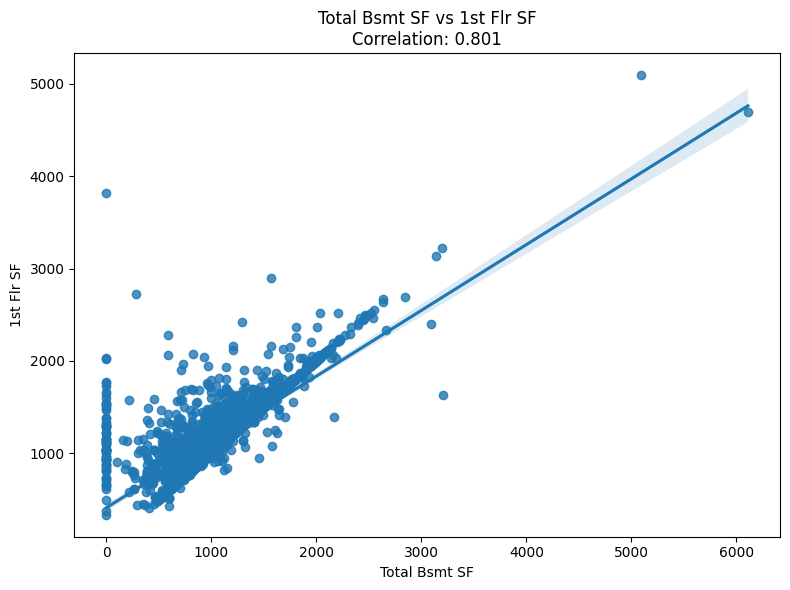

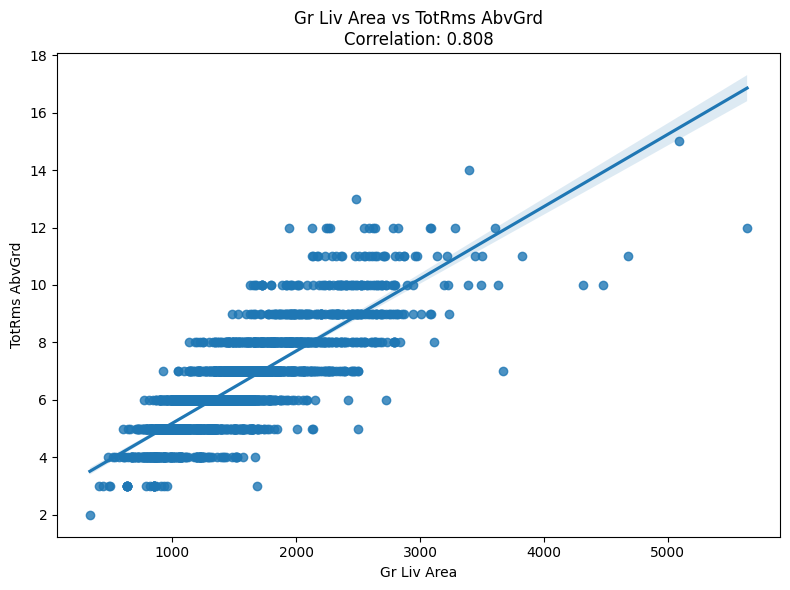

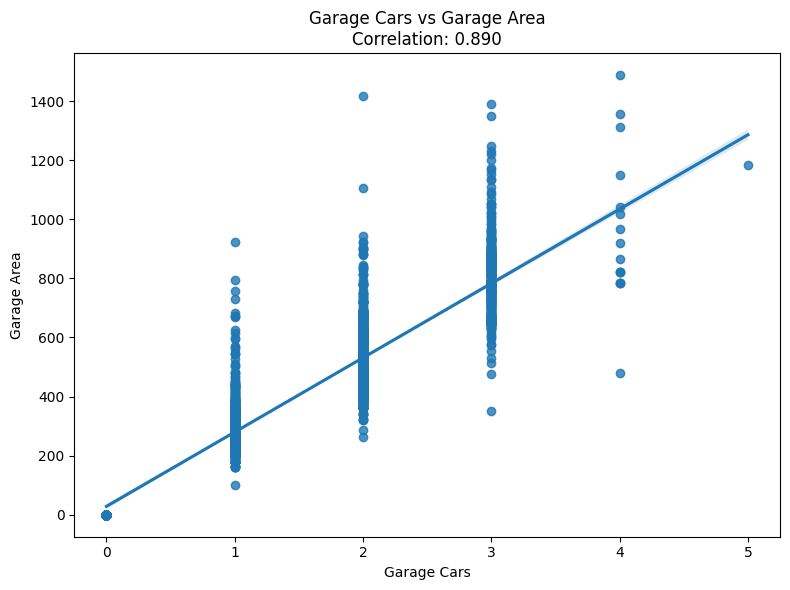

In [96]:

copy_d = dataset.copy(deep=True)
copy_d.drop(columns= ['Order', 'PID'], inplace=True)
correlation_matrix= copy_d.select_dtypes(['float64','int64']).corr()


high_corr_pairs=[]

cols = correlation_matrix.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        x = cols[i]
        y = cols[j]
        corr = correlation_matrix.loc[x, y]  
        if abs(corr) > 0.75:
            high_corr_pairs.append((x, y, corr))

for col1, col2, corr in high_corr_pairs:
    plt.figure(figsize=(8, 6))
    sbs.regplot(data=dataset, x=col1, y=col2)
    plt.title(f"{col1} vs {col2}\nCorrelation: {corr:.3f}")
    plt.tight_layout()
    plt.show()

In [50]:
#dropping the PID , Order Column
# Yr Sold, Sale Price, Year Built, Total Bsmt SF, Gr Liv Area because they have a high correlation with other features, we are gonna keep them 
#and delete the others

localCopy.drop(columns=['PID','Order','Overall Qual', 'Garage Yr Blt', '1st Flr SF','TotRms AbvGrd', 'Garage Cars'],inplace=True)
print("success")

success


In [51]:
localCopy.drop(index=[1341,1497,1577,2236],inplace=True)

In [52]:
#skewness and kurtosis for numerical data


for col in numerical_data:
    sk=skew(numerical_data[col],nan_policy='omit')
    kr=kurtosis(numerical_data[col],nan_policy='omit')
    if abs(sk)>2:
        print(f"Skewness: {sk}, {col}")
    if abs(kr)>3:
        print(f"Kurtosis: {kr}, {col}")

Kurtosis: 11.209383611804348, Lot Frontage
Skewness: 12.814333637733153, Lot Area
Kurtosis: 264.5695807401821, Lot Area
Skewness: 2.6056393984991546, Mas Vnr Area
Kurtosis: 9.268605596399837, Mas Vnr Area
Kurtosis: 6.845533327504242, BsmtFin SF 1
Skewness: 4.137858005790364, BsmtFin SF 2
Kurtosis: 18.74738763850157, BsmtFin SF 2
Kurtosis: 9.117976899115018, Total Bsmt SF
Kurtosis: 6.954874962395786, 1st Flr SF
Skewness: 12.111956844115396, Low Qual Fin SF
Kurtosis: 175.30537502549996, Low Qual Fin SF
Kurtosis: 4.128733326079618, Gr Liv Area
Skewness: 3.9387763268408165, Bsmt Half Bath
Kurtosis: 14.894222917953858, Bsmt Half Bath
Skewness: 4.311615838595926, Kitchen AbvGr
Kurtosis: 19.83380478856079, Kitchen AbvGr
Kurtosis: 6.740388139592321, Wood Deck SF
Skewness: 2.5340877554403782, Open Porch SF
Kurtosis: 10.933611729227085, Open Porch SF
Skewness: 4.012390205634154, Enclosed Porch
Kurtosis: 28.436568257643188, Enclosed Porch
Skewness: 11.39795591155961, 3Ssn Porch
Kurtosis: 149.7308

In [53]:
#spearmann correlation between ordinal features, resulted in no correlation between ordinal features
ordinal_list=list(ordinal_maps)
for i,x in enumerate(ordinal_list):
    for y in ordinal_list[i+1:]:
        correlation=spearmanr(localCopy[x],localCopy[y])[0]
        if 0.75<correlation or correlation<-0.75:
            print(f"{x} and {y}: {correlation}")

In [54]:
localCopy.groupby('Sale Type')['SalePrice'].mean().sort_values()


Sale Type
Oth      114920.142857
ConLw    121937.500000
ConLD    127618.120000
COD      132248.287356
VWD      137000.000000
WD       174330.343071
ConLI    180105.555556
CWD      184237.500000
Con      224446.000000
New      275751.309623
Name: SalePrice, dtype: float64

In [ ]:
sk=skew(localCopy['Lot Frontage'],nan_policy='omit')
print(sk)


1.5019163426710014


In [ ]:
#transformed the right skewed feature into a slight left skewed feature

localCopy['Lot Frontage'] = np.log1p(localCopy['Lot Frontage'])
sk=skew(localCopy['Lot Frontage'],nan_policy='omit')
print(sk)


-1.18809796140707


In [ ]:
#transformed Lot Area from 12 right skewed , to -0.5 left skewed

localCopy['Lot Area'] = np.log1p(localCopy['Lot Area'])
sk=skew(localCopy['Lot Area'],nan_policy='omit')


In [66]:
numerical_data=localCopy.select_dtypes(include=['int64','float64'])


for col in numerical_data:
    sk=skew(localCopy[col],nan_policy='omit')
    if sk>2:
        print(f"Coloana: {col} - old skew:{sk}")
        localCopy[col] = np.log1p(localCopy[col])
        sk_new=skew(localCopy[col],nan_policy='omit')
        print(f"New skewness: {sk_new}")


Coloana: Mas Vnr Area - old skew:2.603491982924756
New skewness: 0.5264593607636521
Coloana: BsmtFin SF 2 - old skew:4.135410329257939
New skewness: 2.4466341889767427
Coloana: Low Qual Fin SF - old skew:12.103527135147226
New skewness: 8.568361293635881
Coloana: Bsmt Half Bath - old skew:3.93718133741119
New skewness: 3.7801965849020207
Coloana: Kitchen AbvGr - old skew:4.3082140011430115
New skewness: 3.5254820902756743
Coloana: Open Porch SF - old skew:2.52933331628121
New skewness: -0.048250527296802785
Coloana: Enclosed Porch - old skew:4.0215428942506435
New skewness: 1.968726950467564
Coloana: 3Ssn Porch - old skew:11.390000331552061
New skewness: 8.836234926770304
Coloana: Screen Porch - old skew:3.9522623903942686
New skewness: 2.950574273376792
Coloana: Pool Area - old skew:16.918788619044786
New skewness: 15.01654640609462
Coloana: Misc Val - old skew:21.973503763808235
New skewness: 5.220904357990912


In [ ]:
#checking whether the columns contain negative values or not to know if we can use log


for col in numerical_data.columns:
    if (localCopy[col]<0).any():
        print(f"{col} contains negative values")

In [68]:
#checking 
for col in numerical_data.columns:
    zero_count=(localCopy[col]==0).sum()
    if zero_count>0:
        print(f"{col} contains {zero_count} 0 values")

Mas Vnr Area contains 1744 0 values
BsmtFin SF 1 contains 928 0 values
BsmtFin SF 2 contains 2575 0 values
Bsmt Unf SF contains 243 0 values
Total Bsmt SF contains 78 0 values
2nd Flr SF contains 1676 0 values
Low Qual Fin SF contains 2886 0 values
Bsmt Full Bath contains 1705 0 values
Bsmt Half Bath contains 2751 0 values
Full Bath contains 12 0 values
Half Bath contains 1841 0 values
Bedroom AbvGr contains 8 0 values
Kitchen AbvGr contains 3 0 values
Fireplaces contains 1419 0 values
Garage Area contains 157 0 values
Wood Deck SF contains 1524 0 values
Open Porch SF contains 1297 0 values
Enclosed Porch contains 2468 0 values
3Ssn Porch contains 2889 0 values
Screen Porch contains 2670 0 values
Pool Area contains 2913 0 values
Misc Val contains 2823 0 values


In [97]:
cat_features = [col for col in cat_features if col in localCopy.columns]

for cat_col in cat_features:
    for num_col in numerical_data:
        # Create one group for each category
        groups = [group[num_col].dropna() for _, group in localCopy.groupby(cat_col)]
        
        if len(groups) < 2:
            continue
        all_values = np.concatenate(groups)
        if np.all(all_values == all_values[0]):
            continue
        
        stat,p = kruskal(*groups) #using unpacking operator
        
        if p < 0.05:
            print(f"{num_col} ~ {cat_col}: p = {p:.4f} (non significant)")


MS SubClass ~ MS SubClass: p = 0.0000 (non significant)
Lot Area ~ MS SubClass: p = 0.0000 (non significant)
Overall Cond ~ MS SubClass: p = 0.0000 (non significant)
Year Built ~ MS SubClass: p = 0.0000 (non significant)
Year Remod/Add ~ MS SubClass: p = 0.0000 (non significant)
Mas Vnr Area ~ MS SubClass: p = 0.0000 (non significant)
BsmtFin SF 1 ~ MS SubClass: p = 0.0000 (non significant)
BsmtFin SF 2 ~ MS SubClass: p = 0.0000 (non significant)
Bsmt Unf SF ~ MS SubClass: p = 0.0000 (non significant)
Total Bsmt SF ~ MS SubClass: p = 0.0000 (non significant)
2nd Flr SF ~ MS SubClass: p = 0.0000 (non significant)
Low Qual Fin SF ~ MS SubClass: p = 0.0000 (non significant)
Gr Liv Area ~ MS SubClass: p = 0.0000 (non significant)
Bsmt Full Bath ~ MS SubClass: p = 0.0000 (non significant)
Bsmt Half Bath ~ MS SubClass: p = 0.0000 (non significant)
Full Bath ~ MS SubClass: p = 0.0000 (non significant)
Half Bath ~ MS SubClass: p = 0.0000 (non significant)
Bedroom AbvGr ~ MS SubClass: p = 0.000

C:\Users\Mihai\AppData\Local\Temp\ipykernel_12380\4199155268.py:14: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat,p = kruskal(*groups) #using unpacking operator


SalePrice ~ MS Zoning: p = 0.0000 (non significant)
Year Built ~ Street: p = 0.0015 (non significant)
Year Remod/Add ~ Street: p = 0.0000 (non significant)
Gr Liv Area ~ Street: p = 0.0002 (non significant)
Full Bath ~ Street: p = 0.0016 (non significant)
Bedroom AbvGr ~ Street: p = 0.0372 (non significant)
Misc Val ~ Street: p = 0.0001 (non significant)
SalePrice ~ Street: p = 0.0002 (non significant)
Lot Frontage ~ Lot Shape: p = 0.0000 (non significant)
Lot Area ~ Lot Shape: p = 0.0000 (non significant)
Overall Cond ~ Lot Shape: p = 0.0000 (non significant)
Year Built ~ Lot Shape: p = 0.0000 (non significant)
Year Remod/Add ~ Lot Shape: p = 0.0000 (non significant)
Mas Vnr Area ~ Lot Shape: p = 0.0000 (non significant)
BsmtFin SF 1 ~ Lot Shape: p = 0.0000 (non significant)
Total Bsmt SF ~ Lot Shape: p = 0.0000 (non significant)
2nd Flr SF ~ Lot Shape: p = 0.0009 (non significant)
Low Qual Fin SF ~ Lot Shape: p = 0.0341 (non significant)
Gr Liv Area ~ Lot Shape: p = 0.0000 (non signi

C:\Users\Mihai\AppData\Local\Temp\ipykernel_12380\4199155268.py:14: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat,p = kruskal(*groups) #using unpacking operator


Lot Area ~ Utilities: p = 0.0228 (non significant)
Overall Cond ~ Utilities: p = 0.0244 (non significant)
BsmtFin SF 2 ~ Utilities: p = 0.0227 (non significant)
Bsmt Half Bath ~ Utilities: p = 0.0004 (non significant)
Screen Porch ~ Utilities: p = 0.0025 (non significant)
Misc Val ~ Utilities: p = 0.0014 (non significant)
MS SubClass ~ Lot Config: p = 0.0027 (non significant)
Lot Frontage ~ Lot Config: p = 0.0000 (non significant)
Lot Area ~ Lot Config: p = 0.0000 (non significant)
Year Built ~ Lot Config: p = 0.0000 (non significant)
Year Remod/Add ~ Lot Config: p = 0.0017 (non significant)
Mas Vnr Area ~ Lot Config: p = 0.0253 (non significant)
BsmtFin SF 1 ~ Lot Config: p = 0.0000 (non significant)
BsmtFin SF 2 ~ Lot Config: p = 0.0367 (non significant)
Bsmt Unf SF ~ Lot Config: p = 0.0006 (non significant)
Total Bsmt SF ~ Lot Config: p = 0.0003 (non significant)
Gr Liv Area ~ Lot Config: p = 0.0000 (non significant)
Bsmt Full Bath ~ Lot Config: p = 0.0011 (non significant)
Full Bat

C:\Users\Mihai\AppData\Local\Temp\ipykernel_12380\4199155268.py:14: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat,p = kruskal(*groups) #using unpacking operator


Gr Liv Area ~ Condition 1: p = 0.0000 (non significant)
Bsmt Full Bath ~ Condition 1: p = 0.0137 (non significant)
Full Bath ~ Condition 1: p = 0.0000 (non significant)
Half Bath ~ Condition 1: p = 0.0011 (non significant)
Bedroom AbvGr ~ Condition 1: p = 0.0059 (non significant)
Kitchen AbvGr ~ Condition 1: p = 0.0000 (non significant)
Fireplaces ~ Condition 1: p = 0.0000 (non significant)
Garage Area ~ Condition 1: p = 0.0000 (non significant)
Wood Deck SF ~ Condition 1: p = 0.0001 (non significant)
Open Porch SF ~ Condition 1: p = 0.0000 (non significant)
Enclosed Porch ~ Condition 1: p = 0.0000 (non significant)
3Ssn Porch ~ Condition 1: p = 0.0013 (non significant)
Screen Porch ~ Condition 1: p = 0.0024 (non significant)
Yr Sold ~ Condition 1: p = 0.0492 (non significant)
SalePrice ~ Condition 1: p = 0.0000 (non significant)
Lot Area ~ Condition 2: p = 0.0353 (non significant)
Overall Cond ~ Condition 2: p = 0.0447 (non significant)
Year Built ~ Condition 2: p = 0.0000 (non signif

C:\Users\Mihai\AppData\Local\Temp\ipykernel_12380\4199155268.py:14: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat,p = kruskal(*groups) #using unpacking operator


Kitchen AbvGr ~ Bldg Type: p = 0.0000 (non significant)
Fireplaces ~ Bldg Type: p = 0.0000 (non significant)
Garage Area ~ Bldg Type: p = 0.0000 (non significant)
Wood Deck SF ~ Bldg Type: p = 0.0000 (non significant)
Open Porch SF ~ Bldg Type: p = 0.0000 (non significant)
Enclosed Porch ~ Bldg Type: p = 0.0000 (non significant)
Screen Porch ~ Bldg Type: p = 0.0007 (non significant)
Misc Val ~ Bldg Type: p = 0.0032 (non significant)
Mo Sold ~ Bldg Type: p = 0.0160 (non significant)
SalePrice ~ Bldg Type: p = 0.0000 (non significant)
MS SubClass ~ House Style: p = 0.0000 (non significant)
Lot Frontage ~ House Style: p = 0.0000 (non significant)
Lot Area ~ House Style: p = 0.0000 (non significant)
Overall Cond ~ House Style: p = 0.0000 (non significant)
Year Built ~ House Style: p = 0.0000 (non significant)
Year Remod/Add ~ House Style: p = 0.0000 (non significant)
Mas Vnr Area ~ House Style: p = 0.0000 (non significant)
BsmtFin SF 1 ~ House Style: p = 0.0000 (non significant)
BsmtFin SF

C:\Users\Mihai\AppData\Local\Temp\ipykernel_12380\4199155268.py:14: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat,p = kruskal(*groups) #using unpacking operator


MS SubClass ~ Exterior 2nd: p = 0.0000 (non significant)
Lot Frontage ~ Exterior 2nd: p = 0.0000 (non significant)
Lot Area ~ Exterior 2nd: p = 0.0000 (non significant)
Overall Cond ~ Exterior 2nd: p = 0.0000 (non significant)
Year Built ~ Exterior 2nd: p = 0.0000 (non significant)
Year Remod/Add ~ Exterior 2nd: p = 0.0000 (non significant)
Mas Vnr Area ~ Exterior 2nd: p = 0.0000 (non significant)
BsmtFin SF 1 ~ Exterior 2nd: p = 0.0000 (non significant)
BsmtFin SF 2 ~ Exterior 2nd: p = 0.0000 (non significant)
Bsmt Unf SF ~ Exterior 2nd: p = 0.0000 (non significant)
Total Bsmt SF ~ Exterior 2nd: p = 0.0000 (non significant)
2nd Flr SF ~ Exterior 2nd: p = 0.0000 (non significant)
Low Qual Fin SF ~ Exterior 2nd: p = 0.0064 (non significant)
Gr Liv Area ~ Exterior 2nd: p = 0.0000 (non significant)
Bsmt Full Bath ~ Exterior 2nd: p = 0.0000 (non significant)
Bsmt Half Bath ~ Exterior 2nd: p = 0.0000 (non significant)
Full Bath ~ Exterior 2nd: p = 0.0000 (non significant)
Half Bath ~ Exteri

C:\Users\Mihai\AppData\Local\Temp\ipykernel_12380\4199155268.py:14: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat,p = kruskal(*groups) #using unpacking operator


Total Bsmt SF ~ Electrical: p = 0.0000 (non significant)
Gr Liv Area ~ Electrical: p = 0.0000 (non significant)
Bsmt Full Bath ~ Electrical: p = 0.0000 (non significant)
Full Bath ~ Electrical: p = 0.0000 (non significant)
Half Bath ~ Electrical: p = 0.0000 (non significant)
Bedroom AbvGr ~ Electrical: p = 0.0052 (non significant)
Kitchen AbvGr ~ Electrical: p = 0.0000 (non significant)
Fireplaces ~ Electrical: p = 0.0000 (non significant)
Garage Area ~ Electrical: p = 0.0000 (non significant)
Wood Deck SF ~ Electrical: p = 0.0000 (non significant)
Open Porch SF ~ Electrical: p = 0.0000 (non significant)
Enclosed Porch ~ Electrical: p = 0.0000 (non significant)
SalePrice ~ Electrical: p = 0.0000 (non significant)
MS SubClass ~ Garage Type: p = 0.0000 (non significant)
Lot Frontage ~ Garage Type: p = 0.0000 (non significant)
Lot Area ~ Garage Type: p = 0.0000 (non significant)
Overall Cond ~ Garage Type: p = 0.0000 (non significant)
Year Built ~ Garage Type: p = 0.0000 (non significant)

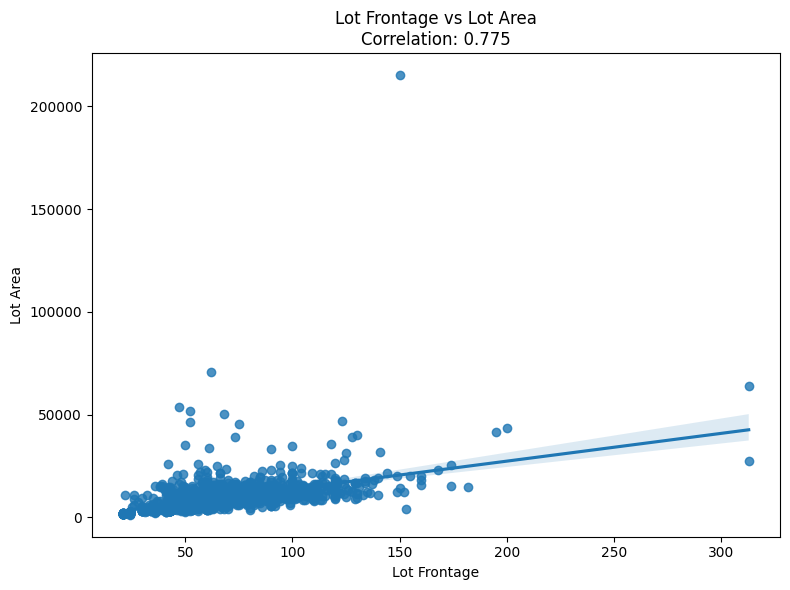

In [92]:
correlation_matrix= localCopy.select_dtypes(['float64','int64']).corr()

high_corr_pairs=[]

cols = correlation_matrix.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        x = cols[i]
        y = cols[j]
        corr = correlation_matrix.loc[x, y]  
        if abs(corr) > 0.75:
            high_corr_pairs.append((x, y, corr))

for col1, col2, corr in high_corr_pairs:
    plt.figure(figsize=(8, 6))
    sbs.regplot(data=dataset, x=col1, y=col2)
    plt.title(f"{col1} vs {col2}\nCorrelation: {corr:.3f}")
    plt.tight_layout()
    plt.show()